In [117]:

pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [118]:


import datetime
import numpy as np
import pandas as pd

import pickle
import scipy
import scipy.sparse as sp

#from utils import tf_idf

In [119]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [120]:
# INPUT_DATA_FOLDER = "data/all_data_preprocessed"
INPUT_DATA_FOLDER = ""

ISW_DATA_FILE = "all_isw.csv"
WEATHER_EVENTS_DATA_FILE = "all_hourly_weather_events.csv"

MODEL_FOLDER = "model"

tfidf_transformer_model = "tfidf_transformer"
count_vertorizer_model = "count_vectorizer"
# alarm_classifier = "alarm_classifier"

tfidf_transformer_version = "v1"
count_vertorizer_version = "v1"
# alarm_classifier_version = "v3"

In [121]:
def isNaN(num):
    return num != num

In [122]:
df_isw = pd.read_csv(f"{ISW_DATA_FILE}", sep=";")

In [123]:
df_isw.head(5)

,Unnamed: 0,date,title,text_title,text_main,main_html_v8,main_html,main_html1,main_html2,main_html3,main_html4,data_stemmed,data_lemmatized,keywords,report_date,date_tomorrow_datetime
0,1,2022-02-25,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"<div class=""field field-name-body field-type-t...",\nRussian forces entered major Ukrainian citie...,\nrussian forces entered major ukrainian citie...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forc enter major ukrainian cities—inc...,russian force entered major ukrainian cities—...,"{'february': 0.339, 'kyiv': 0.323, 'pm': 0.295...",2022-02-25,2022-02-26
1,2,2022-02-26,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"<div class=""field field-name-body field-type-t...",\nRussian forces’ main axes of advance in the ...,\nrussian forces’ main axes of advance in the ...,russian forces’ main axes of advance in the l...,russian forces’ main axes of advance in the l...,russian forces main axes of advance in the la...,russian forces main axes advance last twenty ...,russian forc main axe advanc last twenti four...,russian force main ax advance last twenty fou...,"{'february': 0.409, 'kyiv': 0.367, 'twenty': 0...",2022-02-26,2022-02-27
2,3,2022-02-27,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"<div class=""field field-name-body field-type-t...",\nThe Russian military has likely recognized t...,\nthe russian military has likely recognized t...,the russian military has likely recognized th...,the russian military has likely recognized th...,the russian military has likely recognized th...,russian military likely recognized initial ex...,russian militari like recogn initi expect lim...,russian military likely recognized initial ex...,"{'february': 0.496, 'seven': 0.349, 'twenty': ...",2022-02-27,2022-02-28
3,4,2022-02-28,"Russian Offensive Campaign Assessment, Februar...","Russian Offensive Campaign Assessment, Februar...","<div class=""field field-name-body field-type-t...",The Russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its mili...,russian military reorganizing military effort...,russian militari reorgan militari effort atte...,russian military reorganizing military effort...,"{'february': 0.553, 'eight': 0.349, 'twenty': ...",2022-02-28,2022-03-01
4,5,2022-03-01,"Russian Offensive Campaign Assessment, March 1...","Russian Offensive Campaign Assessment, March 1","<div class=""field field-name-body field-type-t...",Russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforceme...,russian forces completing reinforcement resup...,russian forc complet reinforc resuppli troop ...,russian force completing reinforcement resupp...,"{'kyiv': 0.359, 'chernihiv': 0.218, 'hour': 0....",2022-03-01,2022-03-02


In [124]:
df_weather_events = pd.read_csv(f"{WEATHER_EVENTS_DATA_FILE}", sep=";")

In [125]:
df_weather_events.head(10)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,city,region,center_city_ua,center_city_en,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_start,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch
0,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,00:00:00,1645653600,2.4,89.18,0.8,0.000,0.0,0.1,0.2,['snow'],31.3,15.5,275.6,1020.0,0.0,91.5,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,01:00:00,1645657200,2.4,87.90,0.6,0.000,0.0,0.0,0.2,['snow'],27.7,14.8,280.3,1021.0,0.2,88.2,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,02:00:00,1645660800,2.9,88.58,1.2,0.000,0.0,0.0,0.1,['snow'],29.2,14.4,310.0,1022.0,10.0,100.0,NaN,NaN,NaN,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,03:00:00,1645664400,2.3,86.63,0.3,0.000,0.0,0.0,0.1,['snow'],23.8,13.3,295.1,1021.0,0.1,92.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,04:00:00,1645668000,1.9,87.85,0.1,0.000,0.0,0.0,0.1,['snow'],24.5,13.3,305.8,1021.0,0.0,93.8,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,05:00:00,1645671600,1.9,91.66,0.6,0.000,0.0,0.0,0.1,NaN,23.4,10.8,296.0,1022.5,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,06:00:00,1645675200,2.0,93.09,1.0,0.000,0.0,0.0,0.1,['snow'],20.9,10.8,300.0,1021.0,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,07:00:00,1645678800,2.0,93.09,1.0,0.000,0.0,0.0,0.1,['snow'],19.1,10.8,300.0,1022.0,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,08:00:00,1645682400,1.8,91.32,0.6,0.118,100.0,0.0,0.1,['snow'],16.9,7.2,303.0,1024.2,4.4,100.0,NaN,NaN,NaN,10.0,"Snow, Overcast",Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [126]:
df_weather_events.drop(df_weather_events.loc[(df_weather_events["day_datetime"] == "2022-02-24")].index, inplace=True)

In [127]:
df_weather_events.drop(df_weather_events.loc[(df_weather_events["day_datetime"] == "2022-02-25")].index, inplace=True)

In [128]:
df_weather_events.head(10)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,city,region,center_city_ua,center_city_en,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_start,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch
48,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,00:00:00,1645826400,0.3,82.07,-2.4,0.0,0.0,0.0,0.0,NaN,14.4,7.9,294.8,1022.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,01:00:00,1645830000,0.1,82.04,-2.6,0.0,0.0,0.0,0.0,NaN,13.7,5.4,289.0,1023.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,02:00:00,1645833600,-0.8,89.99,-2.3,0.0,0.0,0.0,0.0,NaN,12.2,5.7,268.0,1023.6,10.0,90.0,NaN,NaN,NaN,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,03:00:00,1645837200,-0.1,83.24,-2.6,0.0,0.0,0.0,0.0,NaN,8.3,5.0,268.6,1024.0,24.1,63.6,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,04:00:00,1645840800,0.0,83.26,-2.5,0.0,0.0,0.0,0.0,NaN,8.6,5.0,265.8,1024.0,24.1,73.6,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,05:00:00,1645844400,-1.5,89.55,-2.9,0.0,0.0,0.0,0.0,NaN,8.3,7.2,250.0,1024.8,10.0,90.0,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,06:00:00,1645848000,0.2,83.28,-2.3,0.0,0.0,0.0,0.0,NaN,7.2,4.0,258.3,1025.0,24.1,80.3,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,07:00:00,1645851600,0.1,83.27,-2.4,0.0,0.0,0.0,0.0,NaN,6.5,3.6,271.4,1026.0,24.1,72.5,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,08:00:00,1645855200,-0.4,89.42,-1.9,0.0,0.0,0.0,0.0,NaN,9.7,7.2,270.0,1026.8,10.0,84.1,NaN,NaN,NaN,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [129]:
df_isw_short = df_isw[["report_date", "date_tomorrow_datetime", "keywords", "text_main", "data_lemmatized",]]

In [130]:
df_isw_short = df_isw_short.copy().add_prefix('isw_')


In [131]:
df_isw_short.head(10)

,isw_report_date,isw_date_tomorrow_datetime,isw_keywords,isw_text_main,isw_data_lemmatized
0,2022-02-25,2022-02-26,"{'february': 0.339, 'kyiv': 0.323, 'pm': 0.295...","<div class=""field field-name-body field-type-t...",russian force entered major ukrainian cities—...
1,2022-02-26,2022-02-27,"{'february': 0.409, 'kyiv': 0.367, 'twenty': 0...","<div class=""field field-name-body field-type-t...",russian force main ax advance last twenty fou...
2,2022-02-27,2022-02-28,"{'february': 0.496, 'seven': 0.349, 'twenty': ...","<div class=""field field-name-body field-type-t...",russian military likely recognized initial ex...
3,2022-02-28,2022-03-01,"{'february': 0.553, 'eight': 0.349, 'twenty': ...","<div class=""field field-name-body field-type-t...",russian military reorganizing military effort...
4,2022-03-01,2022-03-02,"{'kyiv': 0.359, 'chernihiv': 0.218, 'hour': 0....","<div class=""field field-name-body field-type-t...",russian force completing reinforcement resupp...
5,2022-03-02,2022-03-03,"{'march': 0.563, 'kyiv': 0.392, 'chernihiv': 0...","<div class=""field field-name-body field-type-t...",russian force resumed offensive operation sup...
6,2022-03-03,2022-03-04,"{'march': 0.591, 'eu': 0.179, 'foreign': 0.179...","<div class=""field field-name-body field-type-t...",critical threat project aei march isw publish...
7,2022-03-04,2022-03-05,"{'march': 0.602, 'nato': 0.162, 'lukashenko': ...","<div class=""field field-name-body field-type-t...",critical threat project aei march isw publish...
8,2022-03-05,2022-03-06,"{'reservist': 0.395, 'reserve': 0.269, 'conscr...","<div class=""field field-name-body field-type-t...",early announcement spring draft unlikely incr...
9,2022-03-06,2022-03-07,"{'march': 0.546, 'oil': 0.192, 'ceasefire': 0....","<div class=""field field-name-body field-type-t...",critical threat project aei march isw publish...


In [132]:
df.dtypes

city_resolvedAddress                     object
day_datetime                             object
day_datetimeEpoch                         int64
day_tempmax                             float64
day_tempmin                             float64
day_temp                                float64
day_dew                                 float64
day_humidity                            float64
day_precip                              float64
day_precipcover                         float64
day_solarradiation                      float64
day_solarenergy                         float64
day_uvindex                             float64
day_sunrise                              object
day_sunset                               object
day_moonphase                           float64
hour_datetime                            object
hour_datetimeEpoch                        int64
hour_temp                               float64
hour_humidity                           float64
hour_dew                                

In [133]:
df = df_weather_events.merge(df_isw_short,
                            how = "left",
                            left_on = "day_datetime", 
                            right_on = "isw_date_tomorrow_datetime")

In [134]:
df.shape

(193980, 64)

In [135]:
len(df["city_resolvedAddress"].unique())

23

In [136]:
df["city_resolvedAddress"].unique()

array(['Луцьк, Луцький район, Україна', 'Кропивницький, Україна',
       'Дніпро, Україна', 'Київ, Україна', 'Херсон, Україна',
       'Чернівці, Україна', 'Чернігів, Україна', 'Одеса, Україна',
       'Миколаїв, Україна', 'Харків, Україна',
       'Хмельницька область, Україна', 'Донецьк, Україна',
       'Ужгород, Ужгородський район, Україна', 'Запоріжжя, Україна',
       'Рівне, Україна', 'Житомир, Україна', 'Тернопіль, Україна',
       'Полтава, Україна', 'Львів, Україна', 'Івано-Франківськ, Україна',
       'Черкаси, Україна', 'Суми, Україна', 'Вінниця, Україна'],
      dtype=object)

In [137]:
# df.sample(5).head(5)
# df.loc[df["city_resolvedAddress"] == "Луцьк, Луцький район, Україна"][47:49]

In [138]:
# df.sample(5).head(5)
# df.loc[df["city_resolvedAddress"] == "Кропивницький, Україна"][47:49]

In [139]:
# df.sample(5).head(5)
 #df.loc[df["city_resolvedAddress"] == "Дніпро, Україна"][47:49]

In [140]:

# df.loc[df["isw_date_tomorrow_datetime"] == "2022-02-25"]

In [141]:
df_work = df.assign(is_alarm=lambda x: x['event_day_date'].notnull().astype(int))

In [142]:
df_work.sample(5).head(5)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,city,region,center_city_ua,center_city_en,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_start,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,isw_report_date,isw_date_tomorrow_datetime,isw_keywords,isw_text_main,isw_data_lemmatized,is_alarm
116609,"Запоріжжя, Україна",2022-08-24,1661288400,33.3,18.7,26.5,7.6,33.0,0.0,0.0,275.0,23.6,8.0,05:46:22,19:36:16,0.88,12:00:00,1661331600,28.2,51.28,17.2,0.0,0.0,0.0,0.0,NaN,53.3,27.7,290.0,1016.0,2.0,50.0,778.0,2.8,8.0,10.0,Partially cloudy,Запоріжжя,Запорізька,Запоріжжя,Zaporozhye,Запоріжжя,8,Запоріжжя,Запорізька обл.,1.0,2022-08-24 08:59:26,2022-08-24 09:33:17,2022-08-24 09:33:17,NaN,2022-08-24 08:59:26,2022-08-24 09:33:17,2022-08-24 08:00:00,2022-08-24 10:00:00,2022-08-24,1.661328e+09,1.661335e+09,2022-08-24 09:00:00,1.661332e+09,2022-08-23,2022-08-24,"{'august': 0.376, 'twenty': 0.199, 'three': 0....","<div class=""field field-name-body field-type-t...",click see isw interactive map russian invasio...,1
22729,"Дніпро, Україна",2022-09-25,1664053200,16.9,6.6,11.2,5.1,68.7,0.0,0.0,191.8,16.6,7.0,06:30:22,18:32:09,0.96,02:00:00,1664060400,8.1,87.80,6.2,0.0,0.0,0.0,0.0,NaN,29.9,12.6,250.7,1015.0,24.1,15.3,0.0,NaN,0.0,10.0,Clear,Дніпро,Дніпропетровська,Дніпро,Dnipro,Дніпропетровщина,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-24,2022-09-25,"{'commissar': 0.257, 'mobilization': 0.24, 'se...","<div class=""field field-name-body field-type-t...",click see isw interactive map russian invasio...,0
23418,"Дніпро, Україна",2022-10-21,1666299600,27.2,4.5,8.1,3.1,72.5,0.0,0.0,119.4,10.3,5.0,07:08:30,17:39:55,0.85,20:00:00,1666371600,5.6,71.74,0.9,0.0,0.0,0.0,0.0,NaN,14.0,5.0,304.9,1027.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Дніпро,Дніпропетровська,Дніпро,Dnipro,Дніпропетровщина,4,Дніпропетровщина,Дніпропетровська обл.,1.0,2022-10-21 17:10:19,2022-10-21 17:25:13,2022-10-21 17:25:13,NaN,2022-10-21 17:10:19,2022-10-21 17:25:13,2022-10-21 17:00:00,2022-10-21 18:00:00,2022-10-21,1.666372e+09,1.666375e+09,2022-10-21 17:00:00,1.666372e+09,2022-10-20,2022-10-21,"{'october': 0.425, 'iranian': 0.255, 'twenty':...","<div class=""field field-name-body field-type-t...",karolina hird katherine lawlor riley bailey g...,1
180920,"Суми, Україна",2022-06-29,1656450000,28.6,20.1,23.7,15.3,61.6,0.0,0.0,253.2,22.0,7.0,04:29:52,20:58:30,0.99,17:00:00,1656511200,28.0,36.84,11.9,0.0,0.0,0.0,0.0,NaN,19.8,9.0,54.2,1017.0,24.1,100.0,436.0,1.6,4.0,10.0,Overcast,Суми,Сумська,Суми,Sumy,Сумщина,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-28,2022-06-29,"{'lysychansk': 0.263, 'june': 0.249, 'miroshni...","<div class=""field field-name-body field-type-t...",click see isw interactive map russian invasio...,0
191148,"Вінниця, Україна",2022-09-25,1664053200,16.1,5.6,10.5,4.9,70.9,0.0,0.0,135.5,11.8,6.0,06:56:41,18:58:20,0.96,10:00:00,1664089200,10.5,75.74,6.4,0.0,0.0,0.0,0.0,NaN,11.2,5.0,212.5,1018.0,24.1,76.9,351.0,1.3,4.0,10.0,Partially cloudy,Вінниця,Вінницька,Вінниця,Vinnytsia,Вінниччина,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-24,2022-09-25,"{'commissar': 0.257, 'mobilization': 0.24, 'se...","<div class=""field field-name-body field-type-t...",click see isw interactive map russian invasio

In [143]:
df.loc[1, "isw_data_lemmatized"]

' russian force entered major ukrainian cities—including kyiv kherson—for first time february twenty five russian force main ax advance focused kyiv successfully isolating city bank dnipro river russian military operation along ukraine northern border le well planned organized conducted emanating crimea also le successful far divergence performance likely arises part difference composition organization russian ground force element western military district belarus ukraine north southern military district black sea fleet south east isw previously observed determined well organized ukrainian resistance around kyiv kharkiv also played important role preventing russian military advancing speed success reportedly planned russian military deployed additional force southeastern belarus likely beyond moscow planned use ukraine offset problem challenge russian force remain much larger capable ukraine conventional military however russia likely defeat ukrainian regular military force secure terr

In [144]:
df_work.shape

(193980, 65)

<Axes: xlabel='is_alarm'>

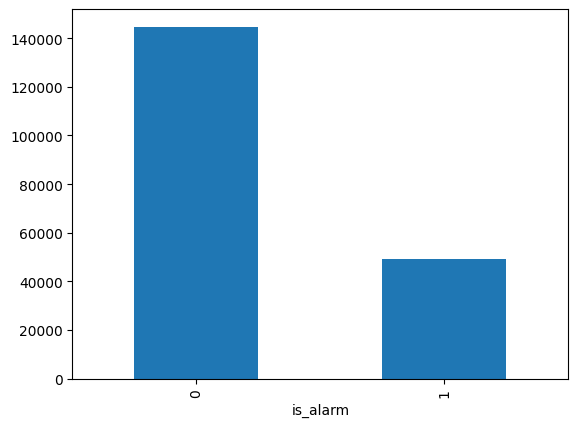

In [145]:
import matplotlib

df_work["is_alarm"].value_counts(dropna=False).plot(kind='bar')

In [146]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
# df_work['isw_data_lemmatized'] = df_work['isw_data_lemmatized'].astype('string')

In [148]:
tfidf = pickle.load(open(f"{MODEL_FOLDER}/{tfidf_transformer_model}_{tfidf_transformer_version}.pkl", "rb"))

# ask.dataframe as dd

# dask_df = dd.from_pandas(df_work, npartitions=10)

cv = pickle.load(open(f"{MODEL_FOLDER}/{count_vertorizer_model}_{count_vertorizer_version}.pkl", "rb"))

In [149]:
# pip install dask


In [151]:
# input = [dask_df['isw_data_lemmatized']]

# word_count_vector = input.map(cv.transform).compute()


word_count_vector = cv.transform(df_isw_short['isw_data_lemmatized'].values.astype('U'))

# word_count_vector = df_work.groupby('isw_data_lemmatized')['isw_data_lemmatized'].transform(lambda x: cv.transform(x.astype('U')))


In [152]:
with open(f"{MODEL_FOLDER}/word_count_vector_calculated.pkl", 'wb') as handle:
    pickle.dump(word_count_vector, handle)

In [153]:
tfidf_vector = tfidf.transform(word_count_vector)

In [154]:
tfidf_vector

<326x9002 sparse matrix of type '<class 'numpy.float64'>'
	with 216700 stored elements in Compressed Sparse Row format>

In [155]:
df_isw_short.shape

(326, 5)

In [156]:
df_work.shape

(193980, 65)

In [157]:
# from scipy.sparse import repeat

In [158]:
# import numpy as np
# tfidf_array = tfidf_vector.toarray()
# tfidf_vector2 = csr_matrix(np.repeat(tfidf_array, df_work.shape[0], axis=0))

In [159]:
with open(f"{MODEL_FOLDER}/tfidf_vector_calculated.pkl", 'wb') as handle:
    pickle.dump(tfidf_vector, handle)

In [160]:
fields_to_exlude = [
    "city_resolvedAddress", 
    "day_datetime",
    "day_datetimeEpoch",
    "hour_datetime",
    "hour_datetimeEpoch",
    "city",
    "region",
    "center_city_ua",
    "center_city_en",
    "event_region_title",
    "event_region_city",
    "event_all_region",
    "event_clean_end",
    "event_intersection_alarm_id",
    "event_start_time",
    "event_end_time",
    "event_start_hour",
    "event_end_hour",
    "event_day_date",
    "event_start_hour_datetimeEpoch",
    "event_end_hour_datetimeEpoch",
    "event_hour_level_event_time",
    "event_hour_level_event_datetimeEpoch",
    "isw_report_date",
    "isw_date_tomorrow_datetime",
    "isw_text_main",
    "isw_keywords",
    "isw_data_lemmatized"
]

In [161]:
df_work_v2 = df_work.drop(fields_to_exlude, axis=1)

In [162]:
df_work_v2.sample(10).head(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,region_alt,region_id,event_start,event_end,is_alarm
164546,34.1,15.1,26.1,16.5,61.2,0.2,4.17,327.6,28.2,9.0,05:20:48,21:28:39,0.03,17.1,91.47,15.7,0.0,0.0,0.0,0.0,NaN,10.4,3.6,250.0,1014.8,10.0,7.7,0.0,NaN,0.0,10.0,Clear,Івано-Франківщина,9,NaN,NaN,0
78443,8.6,4.4,6.3,4.6,88.8,0.0,0.00,52.3,4.6,2.0,07:37:45,16:11:28,0.22,6.1,94.61,5.3,0.0,0.0,0.0,0.0,NaN,23.8,11.5,191.2,1022.0,24.1,75.8,0.0,NaN,0.0,10.0,Partially cloudy,Миколаївщина,14,NaN,NaN,0
158838,10.9,8.0,9.5,7.9,89.4,7.0,8.33,9.5,1.0,0.0,07:26:32,18:58:34,0.24,9.3,92.21,8.1,0.0,0.0,0.0,0.0,NaN,27.7,12.2,271.2,1011.0,24.1,83.1,0.0,NaN,0.0,10.0,Partially cloudy,Львівщина,13,NaN,NaN,0
36865,2.3,-2.7,-0.5,-4.9,73.5,0.0,0.00,149.8,13.0,4.0,06:14:26,17:46:34,0.21,-0.9,89.55,-2.4,0.0,0.0,0.0,0.0,NaN,3.6,1.1,296.0,1015.0,24.1,72.8,0.0,NaN,0.0,10.0,Partially cloudy,Херсонщина,21,NaN,NaN,0
10606,21.7,15.2,18.0,12.8,72.1,3.0,4.17,64.9,5.6,3.0,04:51:23,20:48:00,0.18,16.8,76.77,12.7,0.0,0.0,0.0,0.0,NaN,7.2,3.2,357.7,1015.0,24.1,85.3,79.0,0.3,1.0,10.0,Partially cloudy,Кіровоградщина,11,2022-06-05 02:31:40,2022-06-05 03:13:33,1


In [163]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [164]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn import preprocessing

In [165]:
REGIONS_DICTIONARY_FILE = "regions.csv"
df_regions = pd.read_csv(REGIONS_DICTIONARY_FILE)

In [166]:
short_df_regions = df_regions[["region_alt", "region_id"]]
short_df_regions

,region_alt,region_id
0,Крим,1
1,Вінниччина,2
2,Волинь,3
3,Дніпропетровщина,4
4,Донеччина,5
5,Житомирщина,6
6,Закарпаття,7
7,Запоріжжя,8
8,Івано-Франківщина,9
9,Київщина,10


In [167]:
df_work_v2 = df_work_v2.merge(short_df_regions, 
                            how = "left",   
                            left_on = "region_alt", 
                            right_on = "region_alt")

In [168]:
df_work_v2["hour_conditions"] = df_work_v2["hour_conditions"].apply(lambda x: x.split(",")[0])

In [169]:
label_encoder = preprocessing.LabelEncoder()
df_work_v2["hour_conditions_id"] = label_encoder.fit_transform(df_work_v2["hour_conditions"])

In [170]:
with open(f"{MODEL_FOLDER}/weather_conditions_label_encoder.pkl", 'wb') as handle:
    pickle.dump(label_encoder, handle)

In [171]:
df_work_v2.sample(5).head(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,region_alt,region_id_x,event_start,event_end,is_alarm,region_id_y,hour_conditions_id
33590,10.0,6.4,8.4,6.2,86.1,7.9,8.33,9.3,0.9,0.0,07:02:26,18:30:04,0.27,8.2,85.42,5.9,0.0,0.0,0.0,0.0,['rain'],38.2,16.6,261.5,1009.0,23.3,99.3,18.0,0.1,0.0,10.0,Overcast,Київщина,10,NaN,NaN,0,10,3
26146,0.8,-2.6,-1.2,-4.7,78.0,1.2,8.33,115.5,9.9,3.0,06:27:18,17:51:01,0.18,-1.7,67.64,-6.9,0.0,0.0,0.0,1.1,NaN,36.0,15.1,7.3,1017.0,24.1,68.6,164.0,0.6,0.0,10.0,Partially cloudy,Київщина,10,2022-03-08 15:37:18,2022-03-08 16:26:49,1,10,4
32583,31.4,18.5,24.2,9.4,41.8,0.0,0.00,228.5,19.6,7.0,06:02:43,19:55:49,0.95,21.3,39.84,7.1,0.0,0.0,0.0,0.0,NaN,14.8,5.8,59.5,1014.0,24.1,88.6,0.0,NaN,0.0,10.0,Partially cloudy,Київщина,10,NaN,NaN,0,10,4
94550,8.6,3.8,6.3,4.8,91.0,0.0,0.00,63.3,5.2,3.0,07:21:05,16:31:24,0.66,5.9,95.26,5.2,0.0,0.0,0.0,0.0,NaN,4.7,2.9,274.2,1030.0,24.1,100.0,10.0,0.0,0.0,10.0,Overcast,Хмельниччина,22,NaN,NaN,0,22,3
101465,16.3,8.9,12.7,9.7,82.4,4.8,50.00,78.9,6.8,5.0,06:31:45,18:02:30,0.27,13.6,87.13,11.5,0.0,0.0,0.0,0.0,['rain'],36.4,17.6,174.3,1014.0,18.7,85.9,219.0,0.8,2.0,10.0,Partially cloudy,Донеччина,5,NaN,NaN,0,5,4


In [172]:
tmp_fields_to_exlude = [
    "day_sunrise", 
    "day_sunset", 
    "hour_preciptype",
    "hour_conditions",
    "region_alt",
    "event_start",
    "event_end",
    "hour_solarenergy"
]

In [173]:
df_work_v3 = df_work_v2.drop(tmp_fields_to_exlude, axis=1)

In [174]:
df_work_v3.sample(5).head(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_moonphase,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,hour_severerisk,region_id_x,is_alarm,region_id_y,hour_conditions_id
72909,20.2,13.6,17.3,13.7,79.8,4.5,25.00,125.6,10.9,6.0,0.79,17.8,69.74,12.2,0.3,100.0,0.0,0.0,41.8,18.0,308.1,1006.0,24.1,100.0,224.0,2.0,10.0,14,0,14,5
82282,30.0,19.0,24.7,11.4,45.9,0.0,0.00,345.7,29.8,9.0,0.72,23.0,53.31,13.0,0.0,0.0,0.0,0.0,19.8,10.8,230.0,1004.0,10.0,0.0,387.0,4.0,10.0,20,0,20,0
102437,11.8,5.7,8.1,5.7,85.0,0.0,0.00,79.8,6.9,4.0,0.63,7.0,92.07,5.8,0.0,0.0,0.0,0.0,32.8,15.5,292.5,1022.0,24.1,48.3,0.0,0.0,10.0,5,0,5,4
13298,20.1,13.6,16.8,15.1,89.4,4.0,8.33,63.4,5.3,4.0,0.66,20.1,77.77,16.1,0.0,0.0,0.0,0.0,25.9,14.4,315.4,1004.0,24.1,60.9,104.0,1.0,10.0,11,1,11,4
73080,31.5,21.6,26.5,14.0,49.9,0.0,0.00,309.2,26.6,9.0,0.96,30.1,29.93,10.6,0.0,0.0,0.0,0.0,32.8,15.5,48.4,1014.0,24.1,100.0,843.0,8.0,10.0,14,0,14,3


In [175]:
y =  df_work_v3["is_alarm"]
df_work_v4 = df_work_v3.drop(["is_alarm"], axis=1).fillna(method="ffill")

In [176]:
df_work_v4.sample(5).head(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_moonphase,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,hour_severerisk,region_id_x,region_id_y,hour_conditions_id
83395,28.0,15.0,21.9,11.4,53.2,0.0,0.00,270.3,23.4,8.0,0.11,26.0,47.54,14.0,0.0,0.0,0.0,0.0,20.5,10.8,50.0,1012.0,10.0,35.2,157.0,2.0,10.0,20,20,4
42939,12.7,4.3,7.6,6.1,90.4,0.0,0.00,89.1,7.6,4.0,0.59,6.8,95.30,6.1,0.0,0.0,0.0,0.0,12.2,7.9,251.6,1032.0,24.1,0.0,0.0,0.0,10.0,21,21,0
45004,3.6,-0.7,0.9,-6.8,56.8,0.0,0.00,96.8,8.2,3.0,0.34,0.2,71.04,-4.4,0.0,0.0,0.0,0.5,25.2,9.5,63.0,1033.3,11.9,100.0,0.0,0.0,10.0,24,24,3
62876,16.7,8.1,13.4,1.7,45.6,0.0,0.00,325.5,28.2,9.0,0.17,16.0,40.27,2.5,0.0,0.0,0.0,0.0,15.8,4.7,171.0,1024.0,24.1,0.0,230.0,2.0,10.0,15,15,0
142880,15.4,4.0,8.7,3.7,72.0,3.6,29.17,103.0,9.0,4.0,0.88,13.5,53.72,4.3,0.0,0.0,0.0,0.0,16.2,8.6,178.4,1016.0,24.1,42.5,381.0,4.0,10.0,19,19,4


In [177]:
type(tfidf_vector)

scipy.sparse._csr.csr_matrix

In [178]:
tfidf_vector.shape

(326, 9002)

In [179]:
df_work_v4_csr = scipy.sparse.csr_matrix(df_work_v4.values)
df_all_features = sp.hstack((df_work_v4_csr, tfidf_vector), format='csr')

ValueError: Mismatching dimensions along axis 0: {193980, 326}

In [ ]:
#type(df_work_v4_csr)

NameError: name 'df_work_v4_csr' is not defined

In [ ]:
#df_work_v4_csr.shape

In [ ]:
df_all_features.shape

In [ ]:
RANDOM_STATE = 1

X_train, X_test, y_train, y_test = train_test_split(df_all_features, y,
                                                    test_size = 0.20,
                                                    random_state = RANDOM_STATE,
                                                    shuffle=True
)